<a href="https://colab.research.google.com/github/okwasna/praca_inzynierska/blob/main/wersja_ostateczna13.01%20gooood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [4]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    print(f"\nKMeans dla {n_clusters} klastrów:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
    kmeans.fit(data_normalized)


    df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")


    silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)
    df_filtered['Silhouette'] = silhouette_values


    cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()
    print(f"Średni wskaźnik Silhouette dla każdego klastra:\n{cluster_silhouette_means}")


    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
    print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:\n{cluster_counts}")

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")



KMeans dla 40 klastrów:


<ipython-input-13-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.7677


<ipython-input-13-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.870688
1     0.000000
2     0.000000
3     0.224439
4     0.595880
5     0.000000
6     0.000000
7     0.662184
8     0.049585
9     0.973440
10    0.145729
11    0.217296
12    0.829501
13    0.913241
14    0.275172
15    0.456424
16    0.734065
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.114956
22    0.512103
23    0.000000
24    0.542251
25    0.873223
26    0.658203
27    0.000000
28    0.030916
29    0.936807
30    0.467620
31    0.325333
32    0.428609
33    0.695311
34    0.128532
35    0.000000
36    0.657840
37    0.406363
38    0.416079
39    0.450957
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
9     8292
13    1730
7     1350
0     1210
12    1187
4     1010
22     877
36     729
16     728
24     681
39     643
11     504
15     446
33     441
30     424
14     390
3      317
25     261
29     229
26     201
38     182
37     178
32      

<ipython-input-13-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 45 klastrów: 0.7794


<ipython-input-13-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_45
0     0.973434
1     0.000000
2     0.389216
3     0.210609
4     0.533887
5     0.000000
6     0.594985
7     0.311046
8     0.000000
9     0.913247
10    0.000000
11    0.651763
12    0.825699
13    0.111394
14    0.000000
15    0.865388
16    0.217295
17    0.695311
18    0.000000
19    0.235516
20    0.000000
21    0.734065
22    0.866565
23    0.000000
24    0.530162
25    0.000000
26    0.000000
27    0.101403
28    0.000000
29    0.297918
30    0.872186
31    0.511217
32    0.535840
33    0.180662
34    0.663673
35    0.000000
36    0.394412
37    0.000000
38    0.373491
39    0.805072
40    0.000000
41    0.291485
42    0.399204
43    0.936864
44    0.145911
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 45 klastrów:
Cluster_45
0     8291
9     1730
22    1211
12    1190
15    1118
6     1011
4      751
11     732
21     728
24     681
31     599
7      582
16     504
17     441
42     342
2      302

<ipython-input-13-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 50 klastrów: 0.7893


<ipython-input-13-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_50
0     0.400445
1     0.000000
2     0.973630
3     0.000000
4     0.391480
5     0.929701
6     0.828226
7     0.913306
8     0.000000
9     0.107366
10    0.216632
11    0.861054
12    0.000000
13    0.326499
14    0.000000
15    0.861285
16    0.727172
17    0.000000
18    0.370771
19    0.291372
20    0.000000
21    0.425045
22    0.709660
23    0.000000
24    0.000000
25    0.000000
26    0.513573
27    0.857029
28    0.549810
29    0.000000
30    0.651606
31    0.131799
32    0.251395
33    0.660007
34    0.871028
35    0.000000
36    0.058465
37    0.428398
38    0.645422
39    0.176475
40    0.446398
41    0.535391
42    0.835736
43    0.453891
44    0.000000
45    0.191963
46    0.522344
47    0.346515
48   -0.015044
49    0.000000
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 50 klastrów:
Cluster_50
2     8290
7     1730
15    1216
6     1187
11    1118
38     828
30     732
16     724
28     714
2

<ipython-input-13-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 55 klastrów: 0.7920


<ipython-input-13-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_55
0     0.863280
1     0.000000
2     0.000000
3     0.410062
4     0.114237
5     0.827647
6     0.835736
7     0.000000
8     0.000000
9     0.973616
10    0.000000
11    0.184170
12    0.481399
13    0.915503
14    0.594578
15    0.000000
16    0.389445
17    0.000000
18    0.161749
19    0.326579
20    0.228067
21    0.000000
22    0.388932
23    0.000000
24    0.860795
25    0.000000
26    0.500756
27    0.109479
28    0.000000
29    0.727172
30    0.657561
31    0.936762
32    0.651620
33    0.869842
34    0.446849
35    0.000000
36    0.217494
37    0.000000
38    0.519294
39    0.249228
40    0.345450
41    0.000000
42    0.549810
43    0.703384
44    0.535469
45    0.857709
46    0.000000
47    0.000000
48    0.153524
49    0.275739
50    0.677221
51    0.000000
52    0.000000
53    0.057430
54    0.346467
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 55 klastrów:
Cluster_55
9     8290
13    1723
0  

<ipython-input-13-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 60 klastrów: 0.7965
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_60
0     0.973630
1     0.000000
2     0.704878
3     0.599558
4     0.000000
5     0.124069
6     0.372490
7     0.000000
8     0.431300
9     0.234096
10    0.915390
11    0.000000
12    0.402391
13    0.824868
14    0.683407
15    0.377009
16    0.000000
17    0.000000
18    0.861285
19    0.000000
20    0.596955
21    0.305346
22    0.000000
23    0.103889
24    0.600940
25    0.534332
26    0.000000
27    0.650760
28    0.839083
29    0.862147
30    0.929732
31    0.000000
32    0.000000
33    0.294799
34    0.177864
35    0.416221
36    0.354092
37    0.833790
38    0.376447
39    0.091073
40    0.109998
41    0.857055
42    0.000000
43    0.000000
44    0.000000
45    0.522344
46    0.645306
47    0.410484
48    0.611775
49    0.587733
50   -0.051875
51    0.210480
52    0.690030
53    0.342338
54    0.460083
55    0.500744
56    0.000000
57    0.070714
58    0.178294
59   

<ipython-input-13-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [14]:
import pandas as pd

results = []


cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    silhouette_avg = silhouette_score(data_normalized, df_filtered[f'Cluster_{n_clusters}'])

    cluster_silhouettes = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean().to_dict()

    record = {'Liczba klastrów': n_clusters, 'Średni Silhouette': round(silhouette_avg, 4)}
    record.update({f'Klaster {k}': round(v, 4) for k, v in cluster_silhouettes.items()})
    results.append(record)

silhouette_summary = pd.DataFrame(results)

print(silhouette_summary)


   Liczba klastrów  Średni Silhouette  Klaster 0  Klaster 1  Klaster 2  \
0               40             0.7677     0.8650        0.0     0.0000   
1               45             0.7794     0.9735        0.0     0.3864   
2               50             0.7893     0.3770        0.0     0.9736   
3               55             0.7920     0.8625        0.0     0.0000   
4               60             0.7965     0.9736        0.0     0.7049   

   Klaster 3  Klaster 4  Klaster 5  Klaster 6  Klaster 7  ...  Klaster 50  \
0     0.2658     0.6082     0.0000     0.0000     0.8421  ...         NaN   
1     0.2460     0.6281     0.0000     0.6080     0.5003  ...         NaN   
2     0.0000     0.3878     0.9297     0.8255     0.9120  ...         NaN   
3     0.3698     0.1585     0.8255     0.8338     0.0000  ...      0.6772   
4     0.5996     0.0000     0.1241     0.3725     0.0000  ...     -0.0519   

   Klaster 51  Klaster 52  Klaster 53  Klaster 54  Klaster 55  Klaster 56  \
0         NaN  

In [15]:
from google.colab import files

output_path = 'kmeans_40_clusters.csv'
df_filtered[['Unnamed: 0', 'Cluster_40']].to_csv(output_path, index=False)

files.download(output_path)

print(f"Wyniki klastrowania zapisano do pliku: {output_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Wyniki klastrowania zapisano do pliku: kmeans_40_clusters.csv


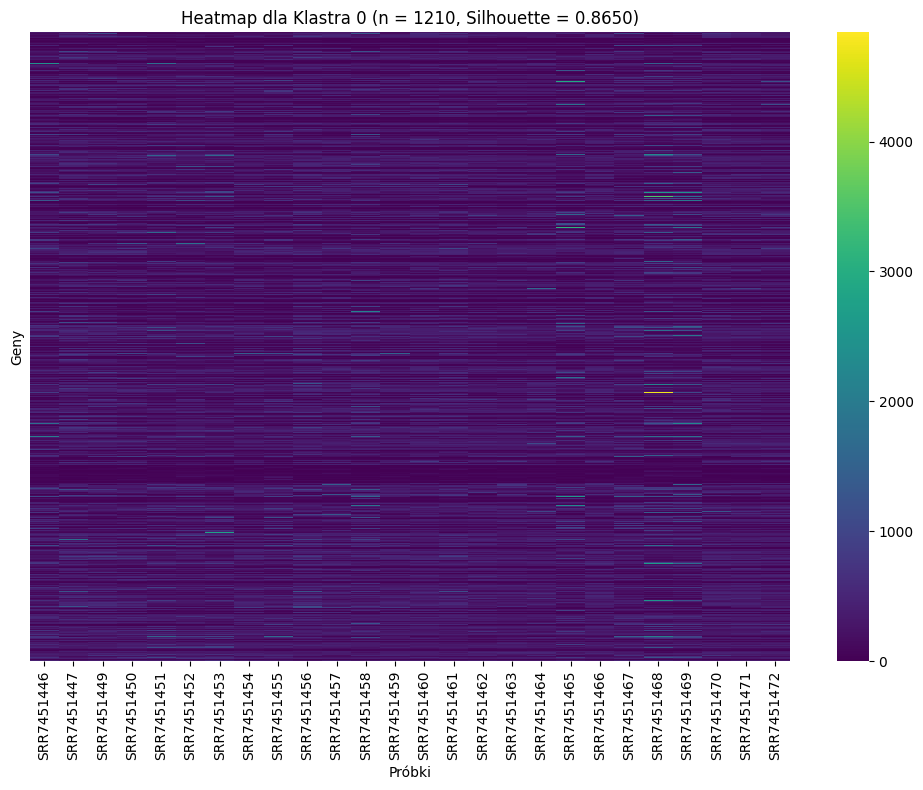

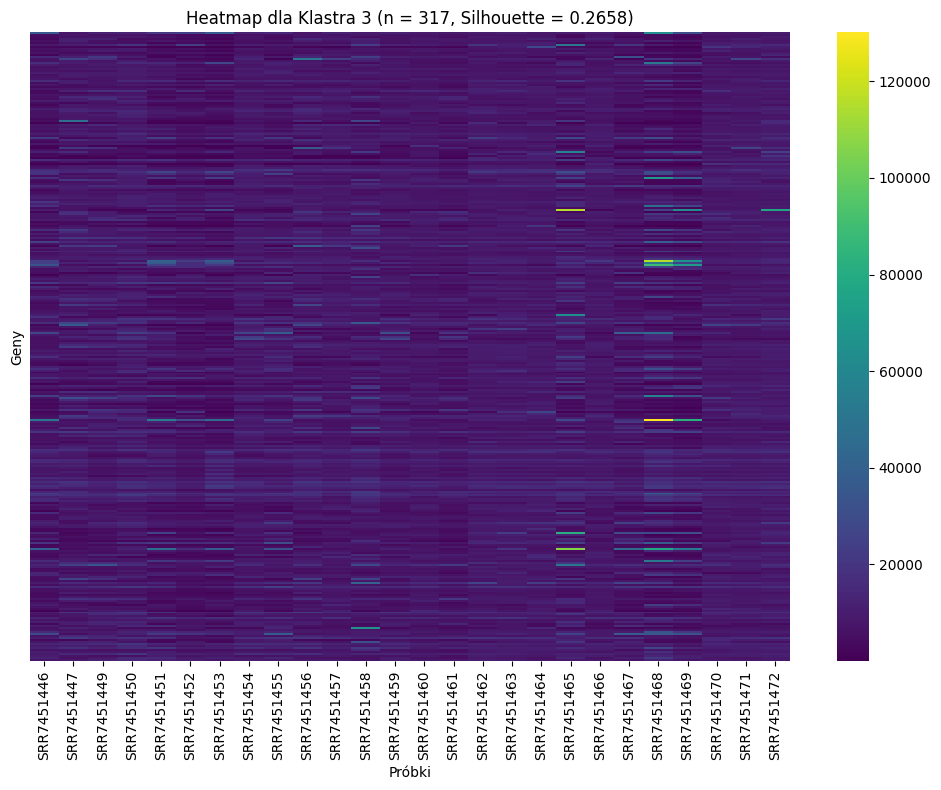

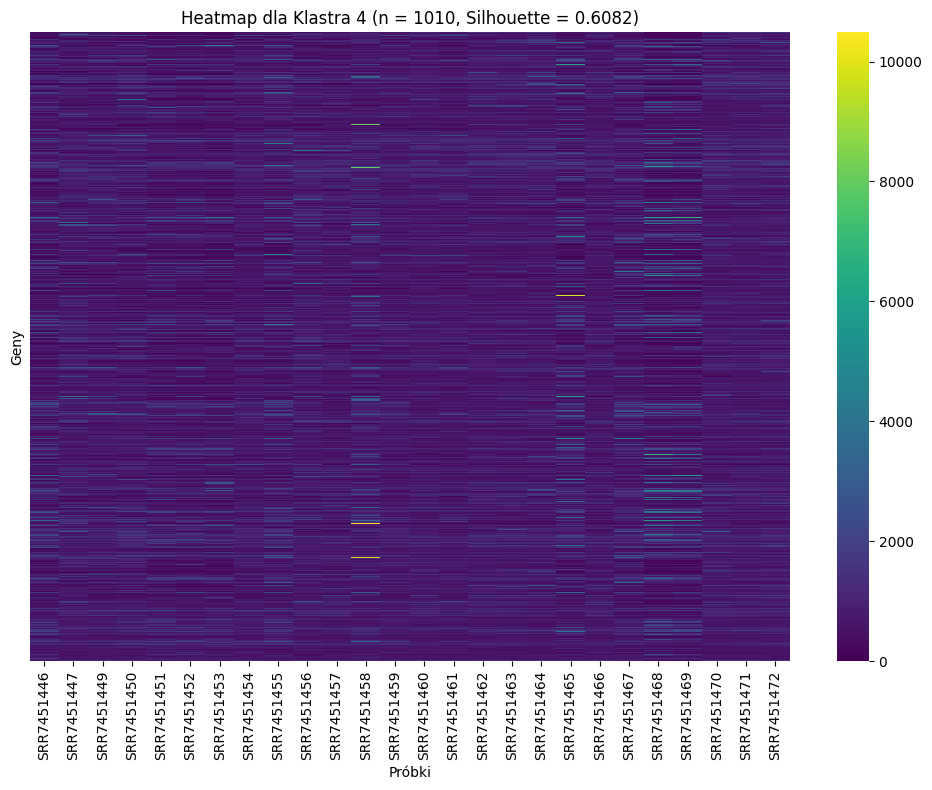

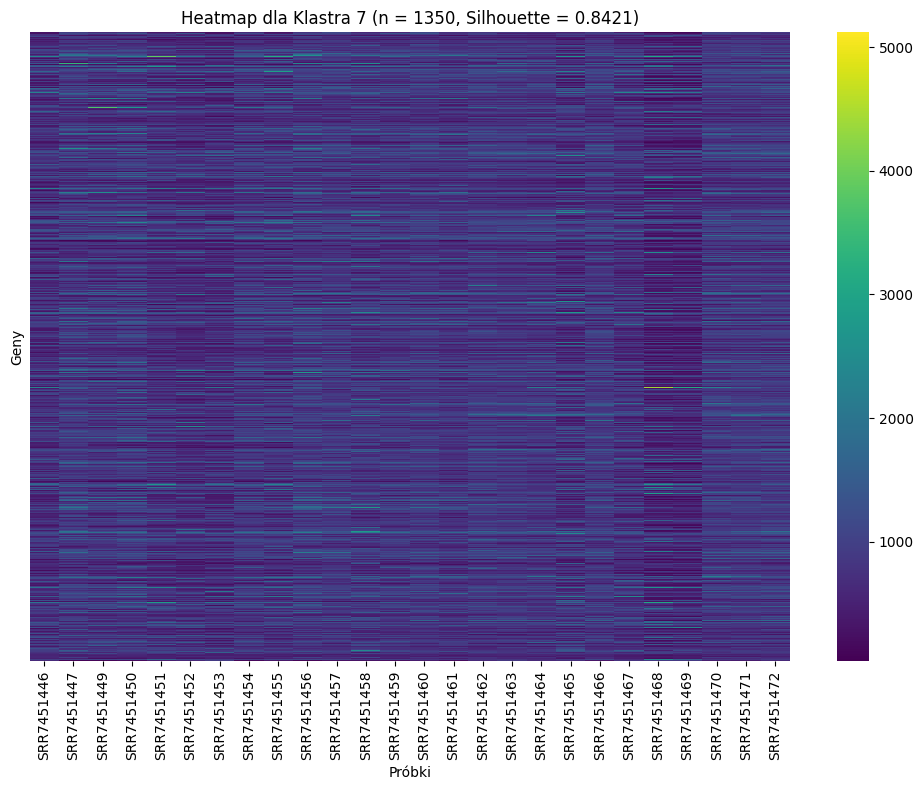

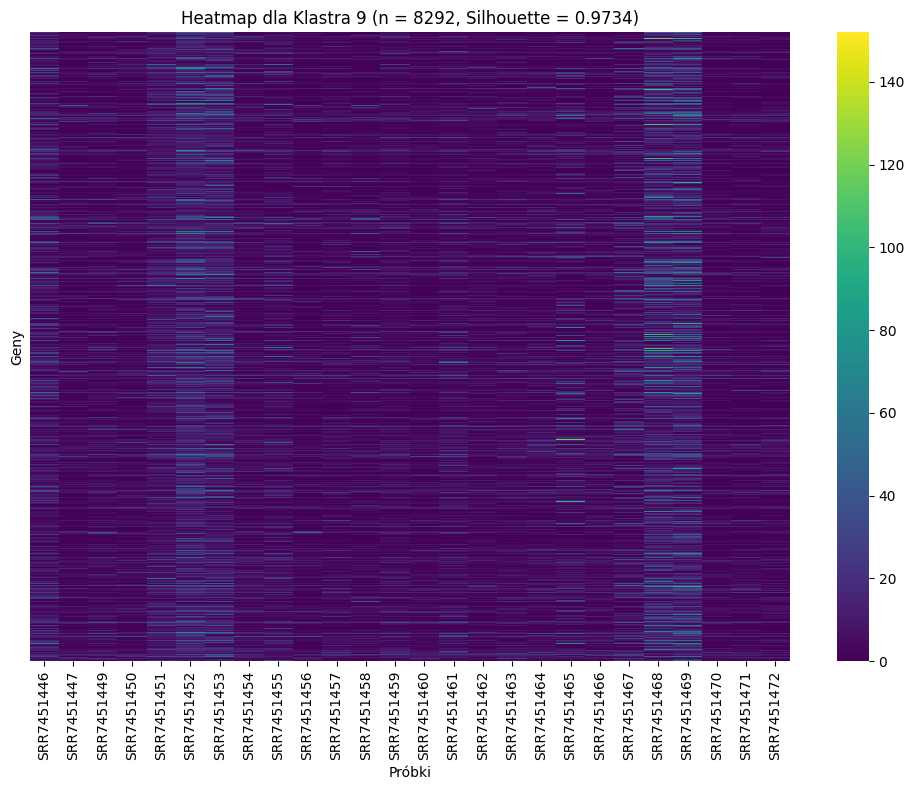

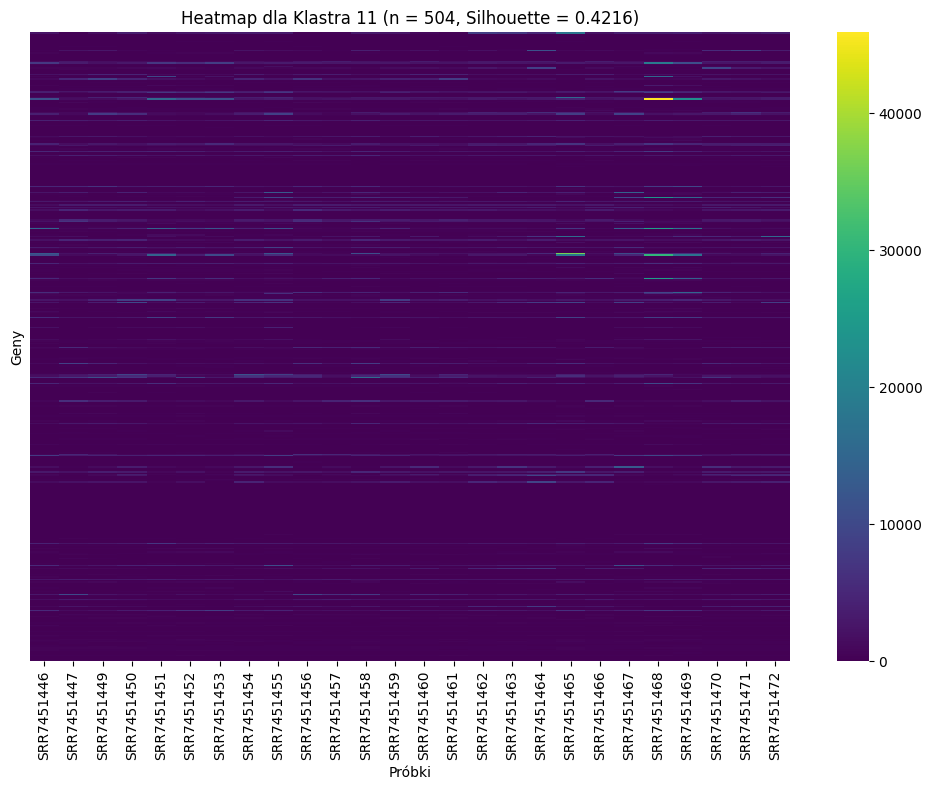

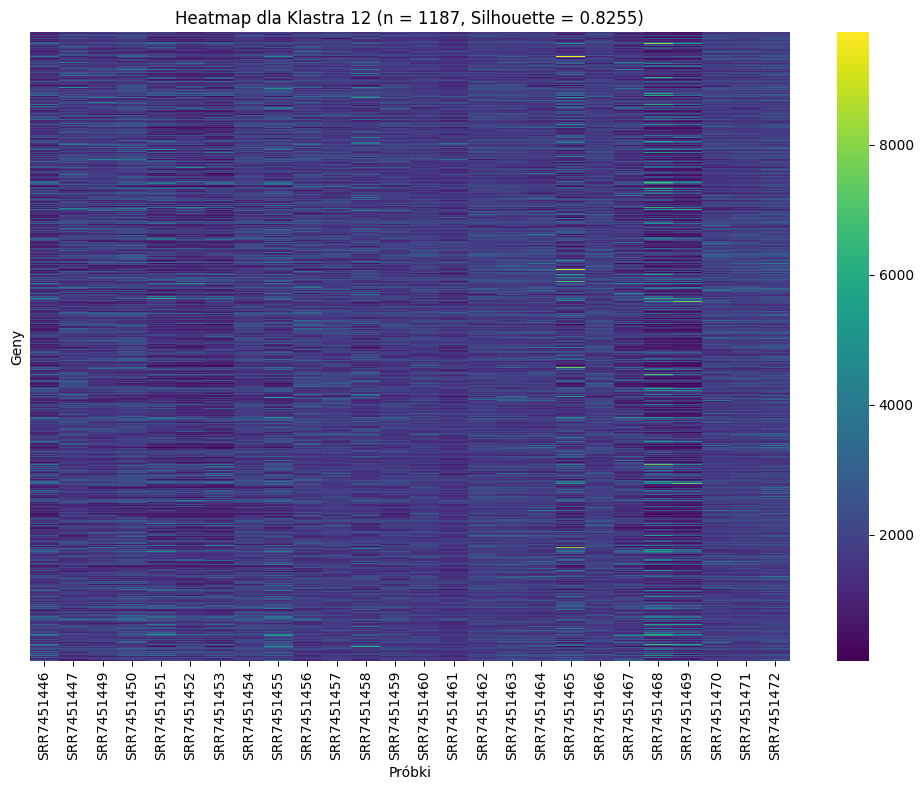

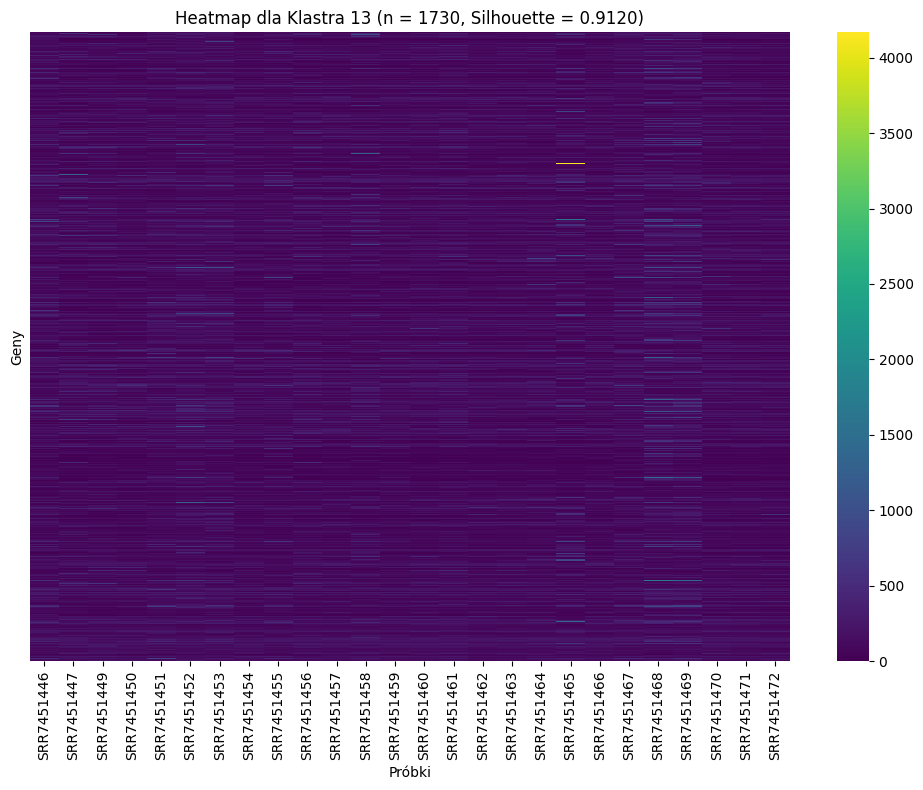

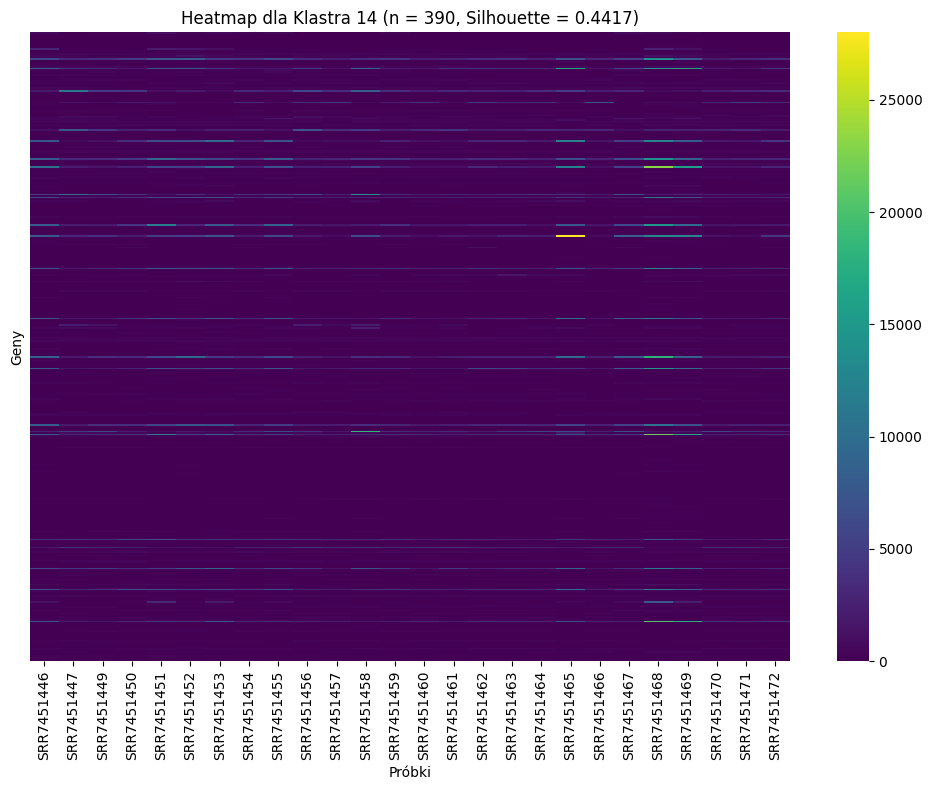

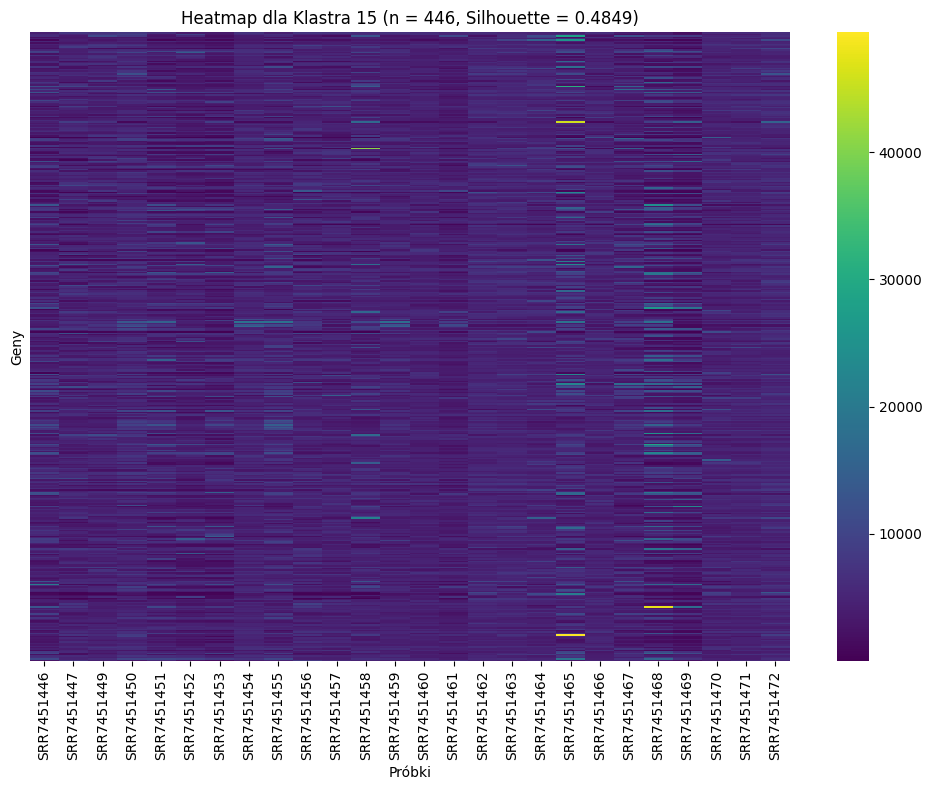

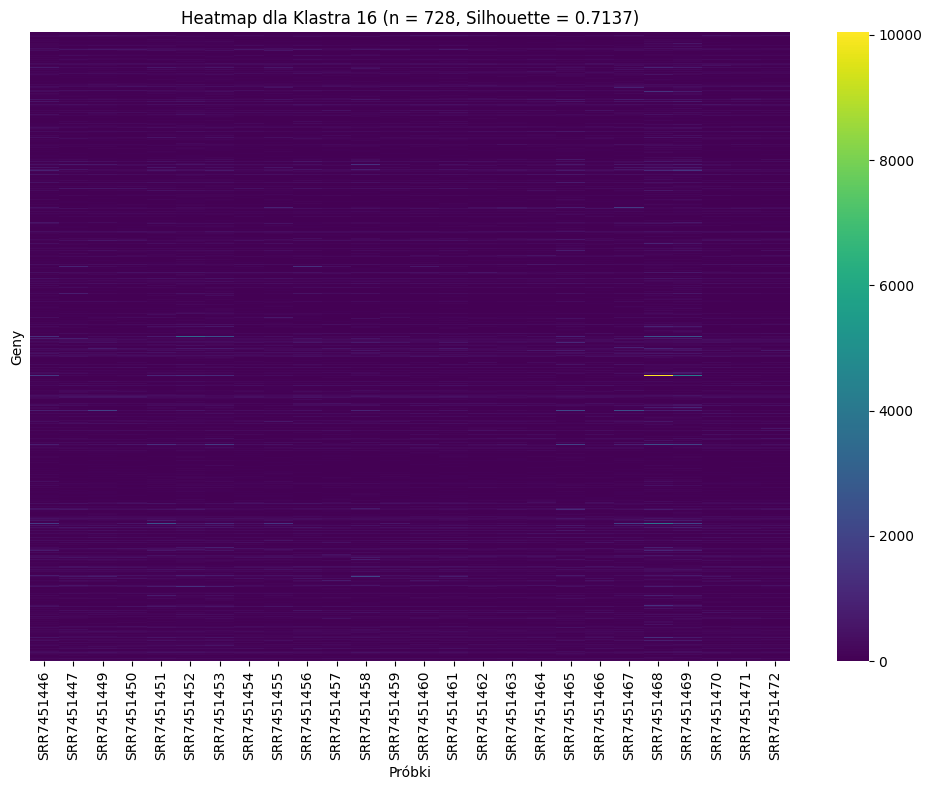

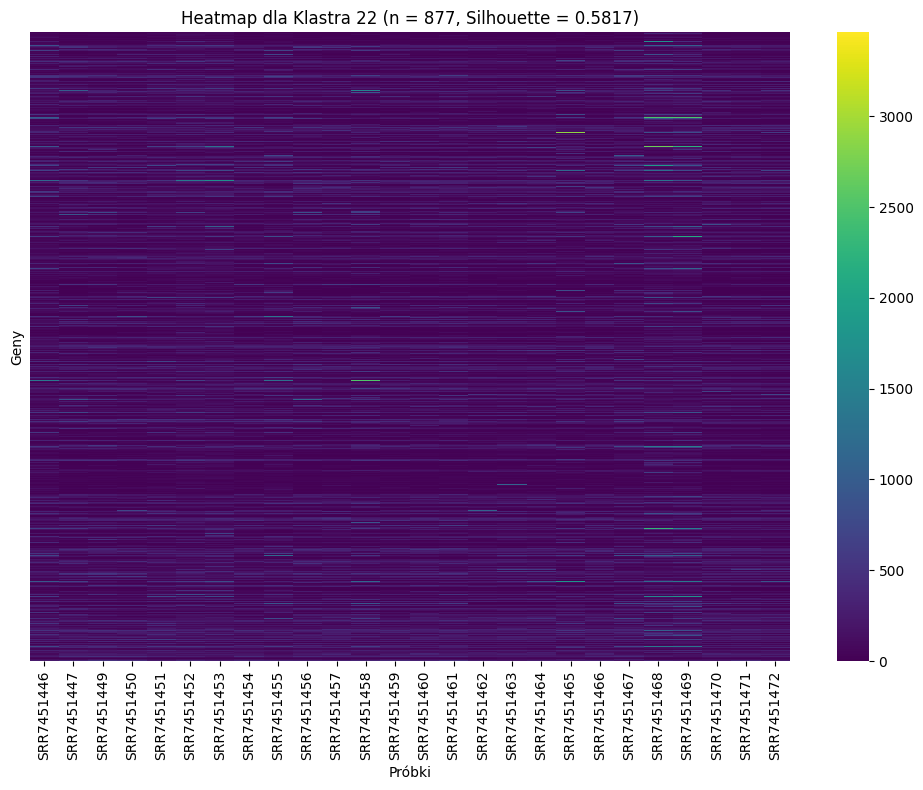

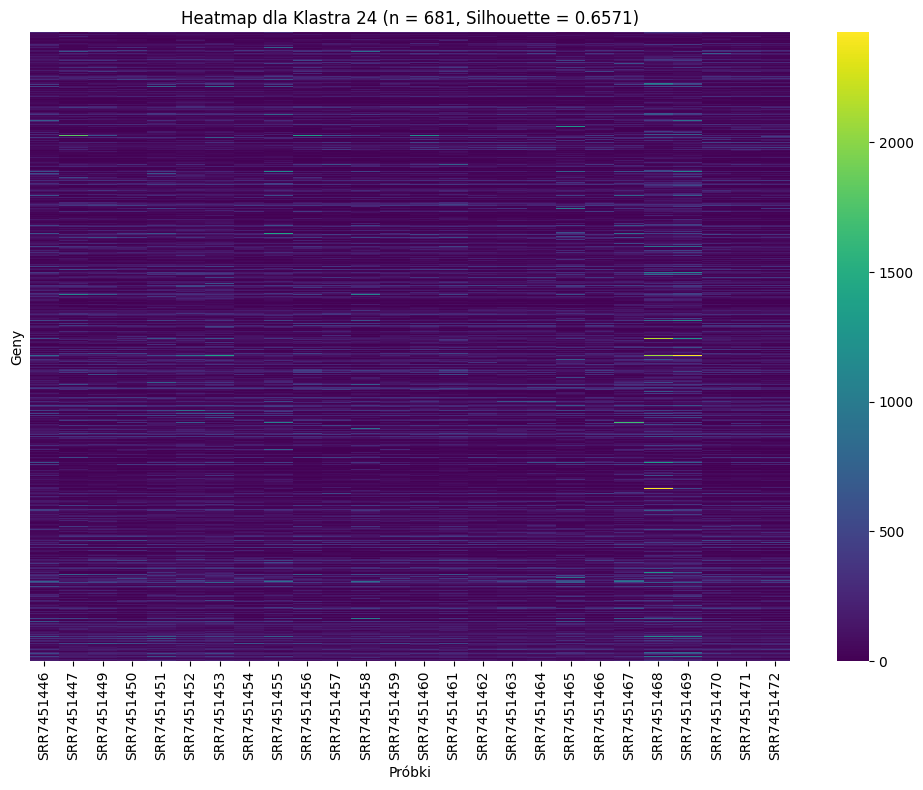

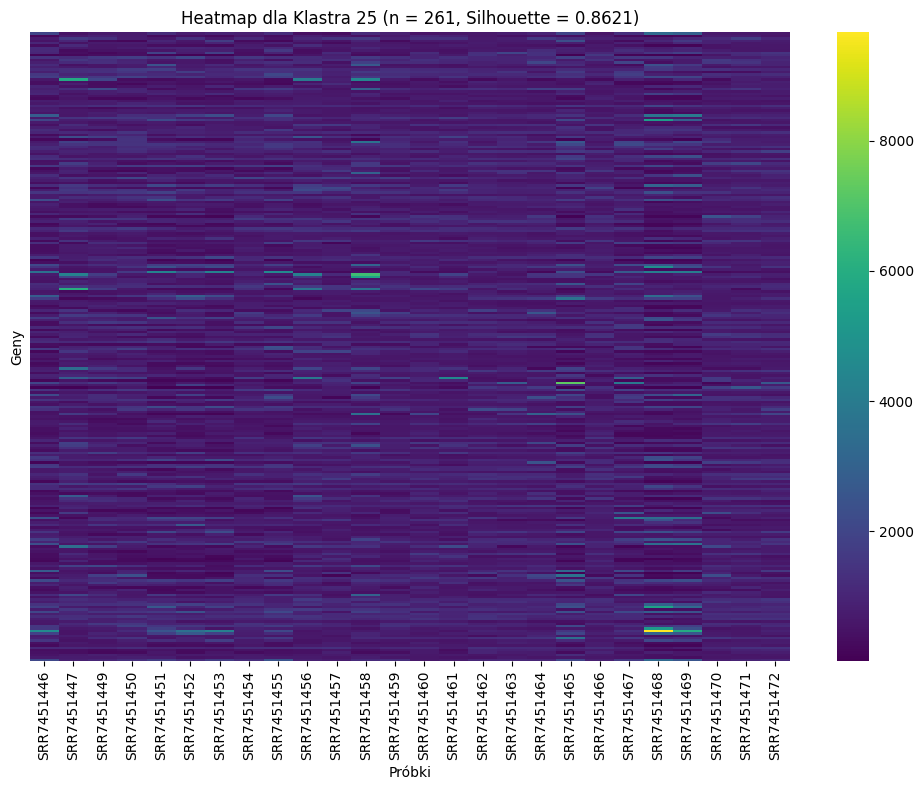

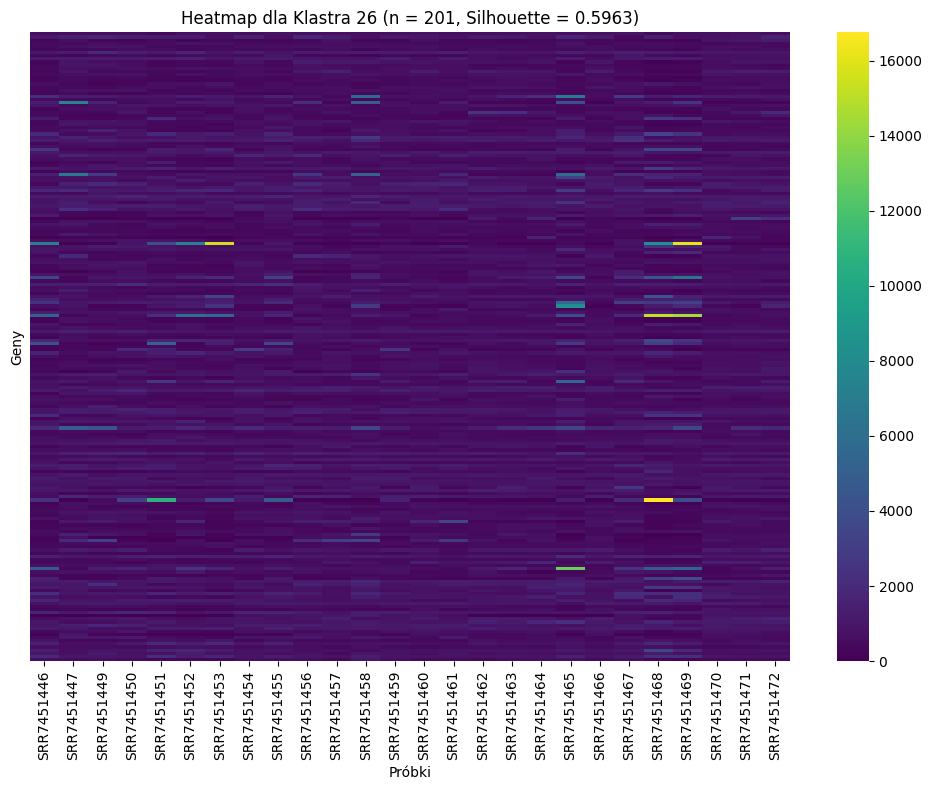

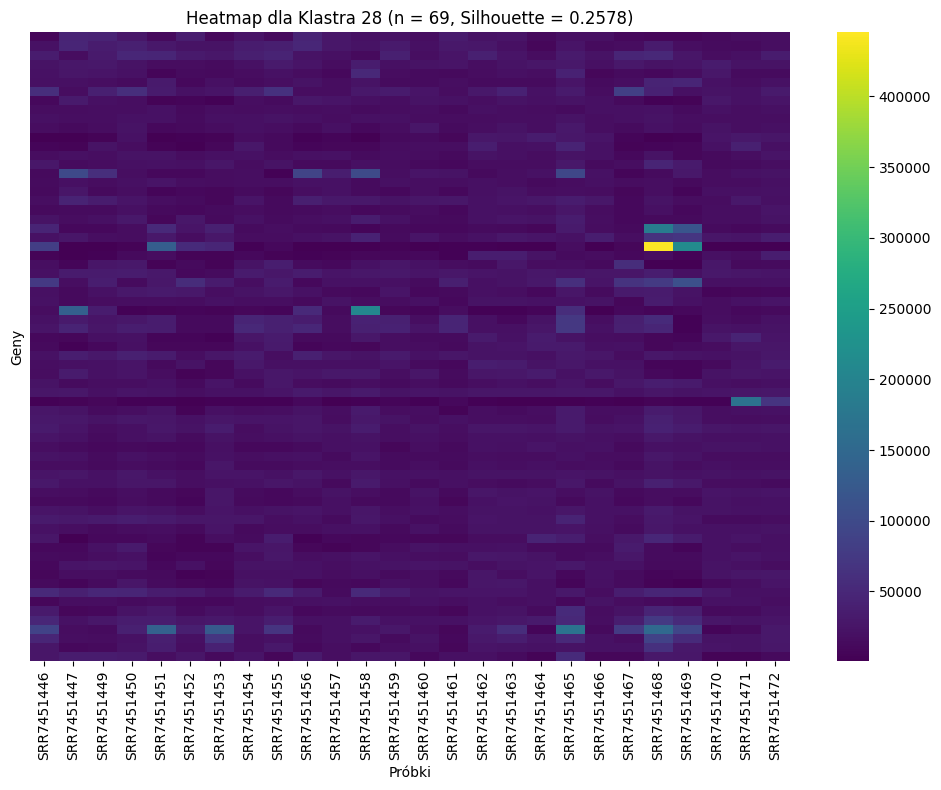

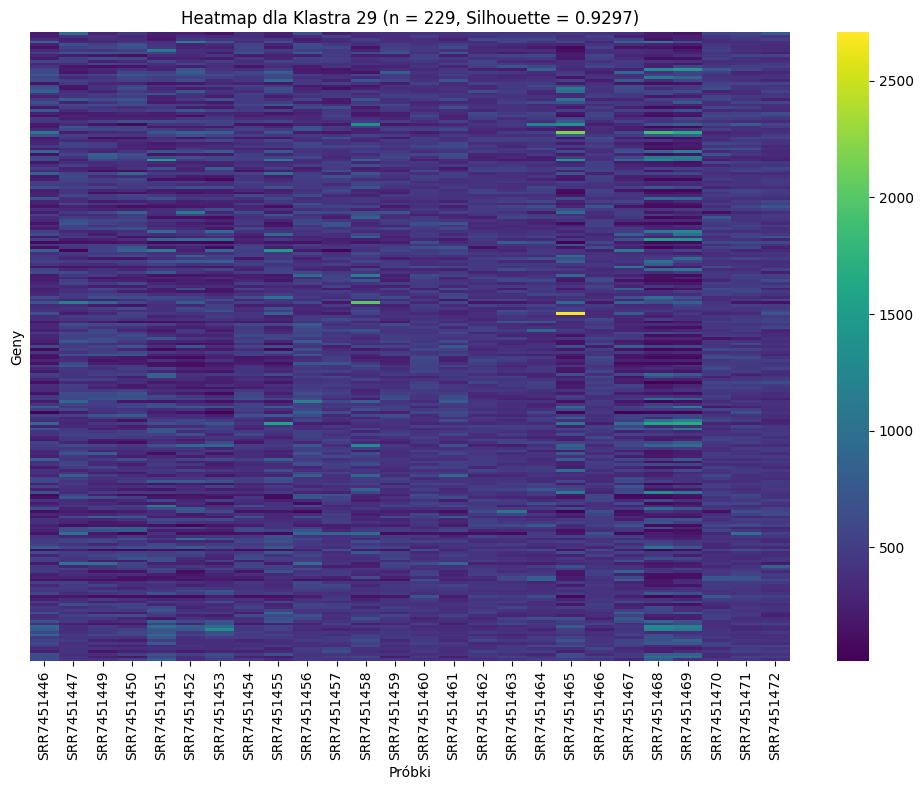

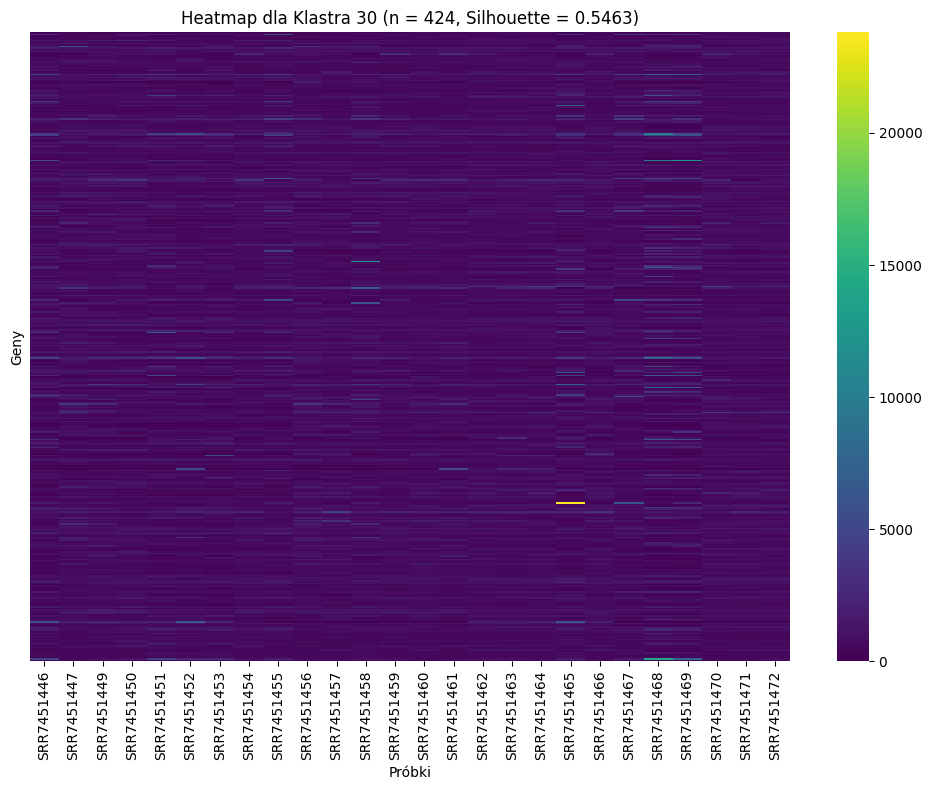

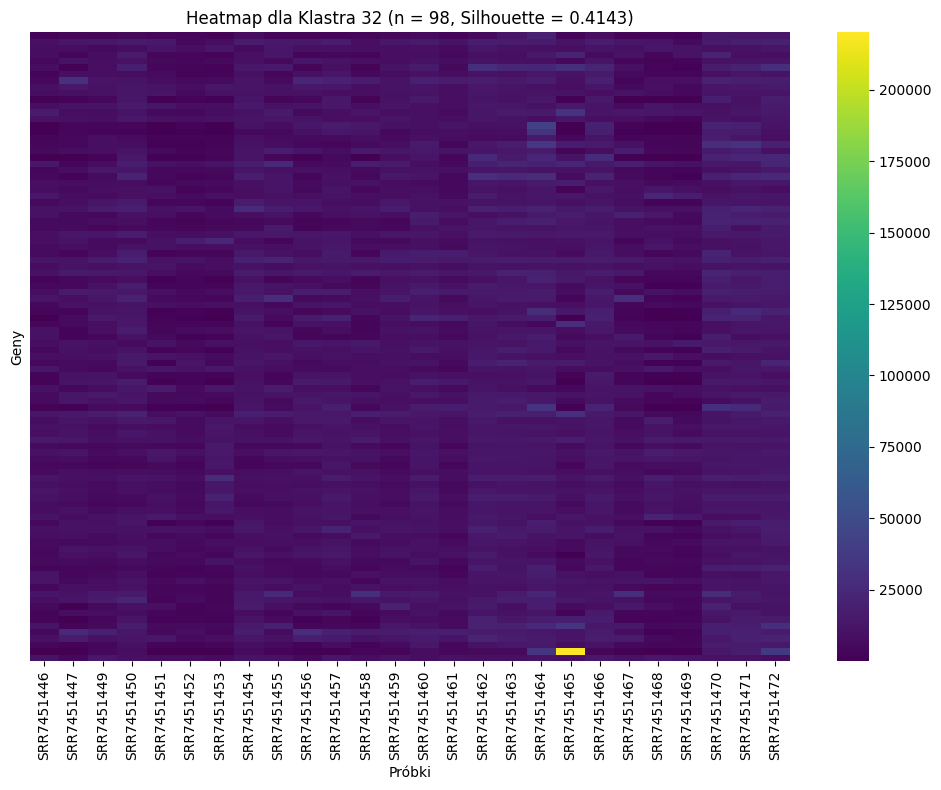

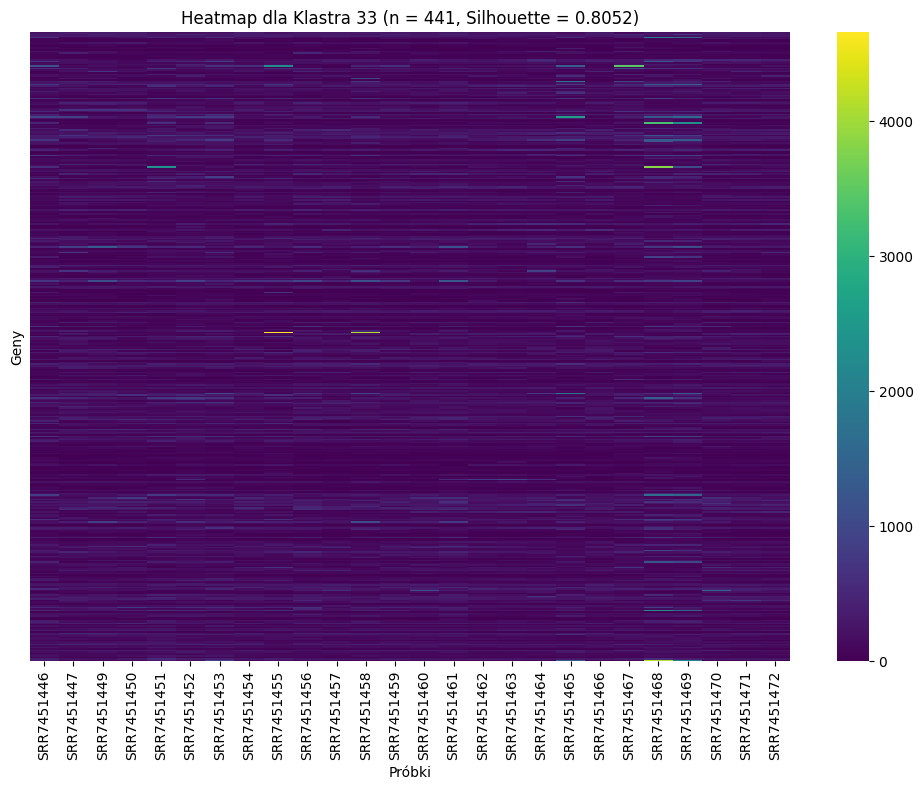

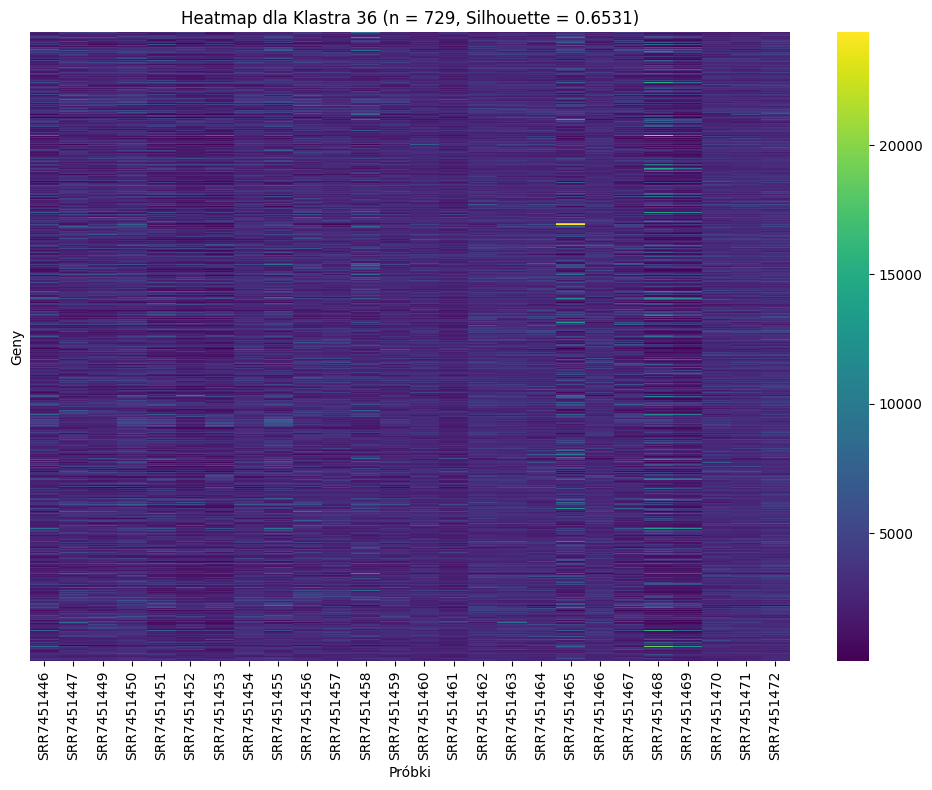

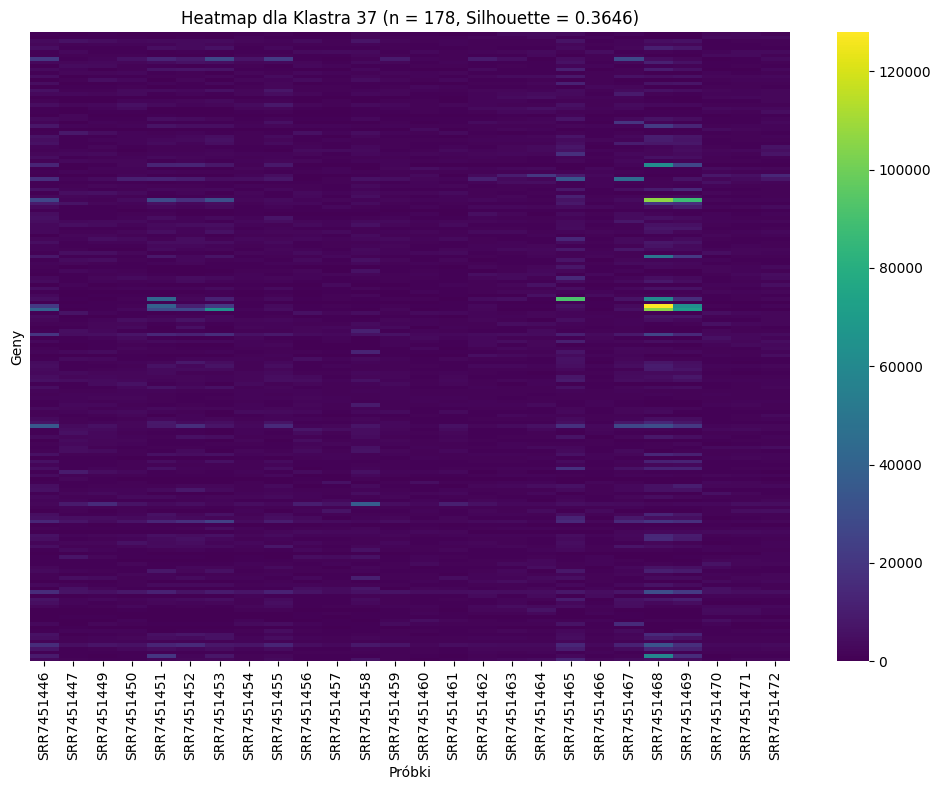

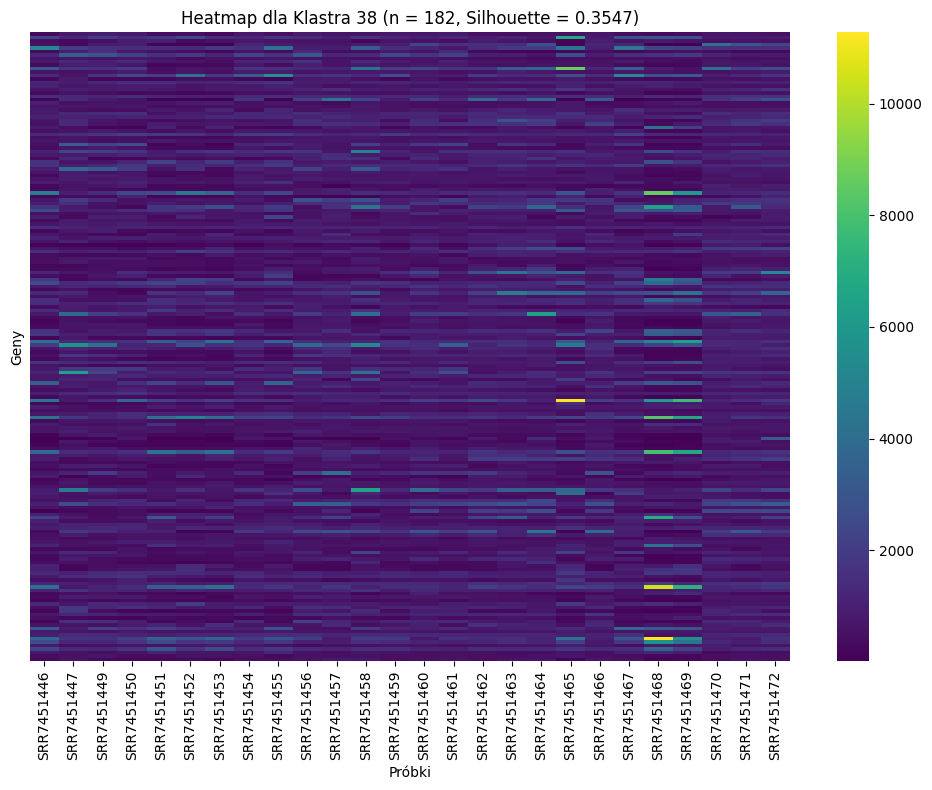

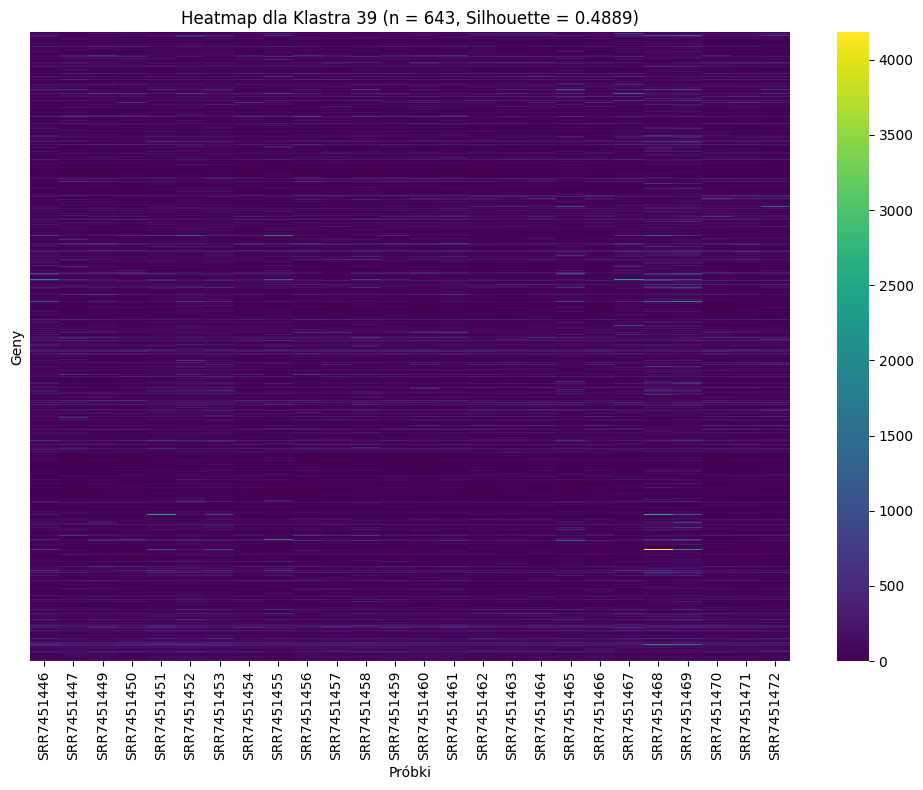

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


n_clusters_to_visualize = 40
min_genes = 50


for cluster_id in range(n_clusters_to_visualize):
    cluster_genes = df_filtered[df_filtered[f'Cluster_{n_clusters_to_visualize}'] == cluster_id]

    if len(cluster_genes) > min_genes:
        heatmap_data = cluster_genes.loc[:, 'SRR7451446':'SRR7451472']
        cluster_silhouette_mean = cluster_genes['Silhouette'].mean()

        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, cmap="viridis", cbar=True, yticklabels=False)

        plt.title(f"Heatmap dla Klastra {cluster_id} (n = {len(cluster_genes)}, Silhouette = {cluster_silhouette_mean:.4f})")
        plt.xlabel("Próbki")
        plt.ylabel("Geny")
        plt.tight_layout()
        plt.show()


In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering_50 = AgglomerativeClustering(n_clusters=50)
agg_labels_50 = agg_clustering_50.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50

agg_silhouette_avg_50 = silhouette_score(data_normalized, agg_labels_50)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): {agg_silhouette_avg_50:.4f}")

agg_cluster_counts_50 = pd.Series(agg_labels_50).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):")
print(agg_cluster_counts_50)


agg_silhouette_values_50 = silhouette_samples(data_normalized, agg_labels_50)
agg_cluster_silhouettes_50 = pd.DataFrame({
    'Cluster': agg_labels_50,
    'Silhouette': agg_silhouette_values_50
}).groupby('Cluster')['Silhouette'].mean()

print("Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):")
print(agg_cluster_silhouettes_50)

<ipython-input-17-baf6710b0c82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50


Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): 0.7819
Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):
40    8303
12    1711
34    1185
39    1158
18    1121
2     1024
22     862
19     739
28     721
5      672
30     544
10     487
0      425
14     409
38     391
13     304
17     261
45     237
42     229
15     227
20     222
46     200
29     199
11     161
43     107
24     105
16      95
1       41
6       33
4       27
21      10
8        6
23       6
9        5
3        4
7        2
25       1
41       1
49       1
32       1
47       1
37       1
48       1
33       1
35       1
44       1
31       1
36       1
27       1
26       1
Name: count, dtype: int64
Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):
Cluster
0     0.207122
1     0.180060
2     0.574123
3     0.274367
4     0.241017
5     0.386914
6     0.102919
7     0.124069
8     0.187148
9     0.244634
10    0.130055
11    0.49

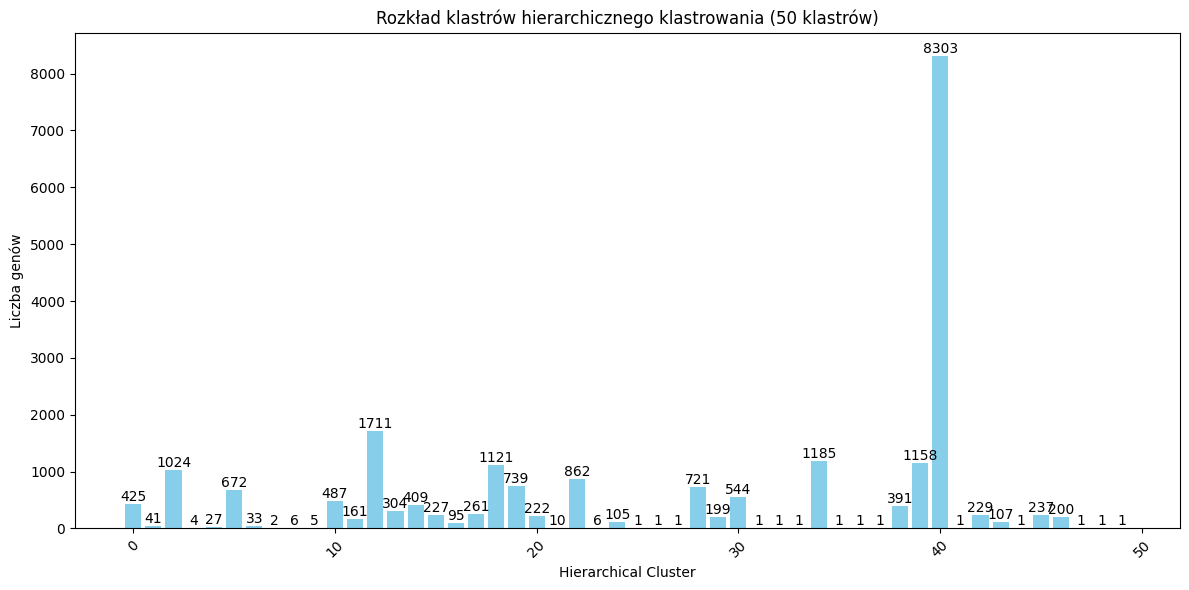

In [18]:
import matplotlib.pyplot as plt


agg_cluster_counts_50 = df_filtered['Agg_Cluster_50'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(agg_cluster_counts_50.index, agg_cluster_counts_50.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Rozkład klastrów hierarchicznego klastrowania (50 klastrów)')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
hierarchical_results = df_filtered[['Unnamed: 0', 'Agg_Cluster_50']].rename(columns={'Unnamed: 0': 'Gene'})
hierarchical_results.to_csv("hierarchical_clustering_results.csv", index=False)

print("Wyniki hierarchicznego klastrowania zapisane do pliku 'hierarchical_clustering_results.csv'.")

Wyniki hierarchicznego klastrowania zapisane do pliku 'hierarchical_clustering_results.csv'.


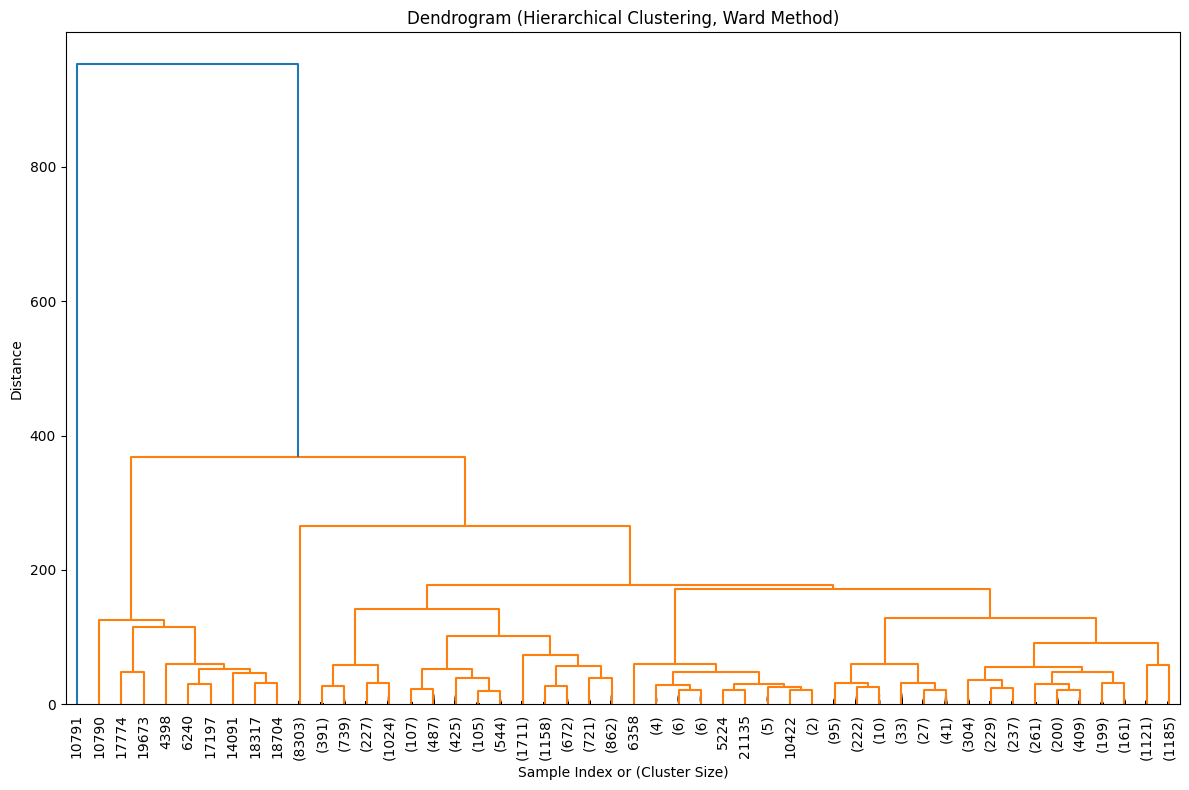

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram (Hierarchical Clustering, Ward Method)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()




In [21]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0     8950
 4     2223
 3     1472
 6     1189
 9     1148
 2      886
 1      811
 7      720
-1      674
 5      620
 8      498
 17     393
 12     346
 18     262
 10     261
 19     229
 20     226
 22     195
 13     194
 14     160
 16     157
 21     127
 24     126
 15     125
 11     105
 23      67
 26      50
 27      14
 28      12
 25       7
Name: count, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-21-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels


<ipython-input-22-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'PCA{i+1}'] = pca_result[:, i]
<ipython-input-22-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'PCA{i+1}'] = pca_result[:, i]
<ipython-input-22-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

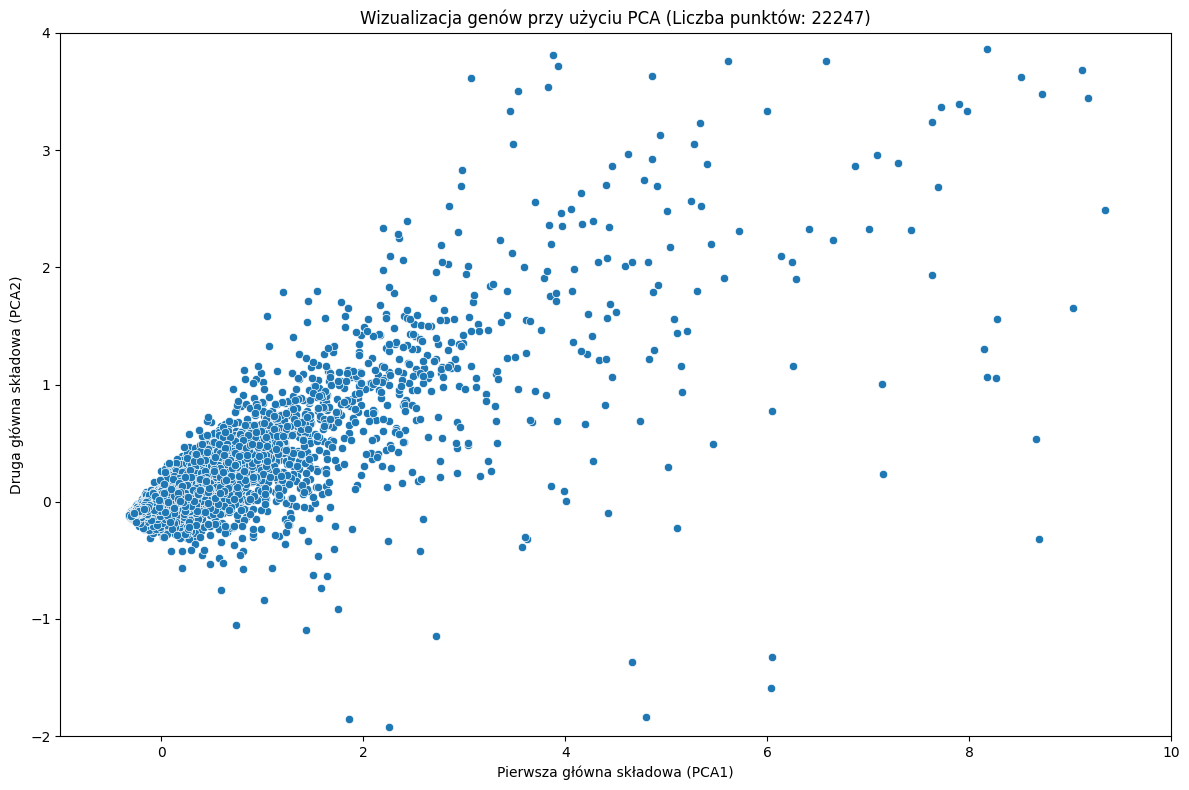

  Principal Component  Explained Variance Ratio
0                PCA1                  0.920489
1                PCA2                  0.060640
2                PCA3                  0.006992
3                PCA4                  0.003096
4                PCA5                  0.002205
5                PCA6                  0.001337
6                PCA7                  0.001137
7                PCA8                  0.000772
8                PCA9                  0.000544
9               PCA10                  0.000523
Całkowita wyjaśniona wariancja przez 10 głównych składowych: 99.77%
Liczba punktów na wykresie: 22247


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_values = df_filtered.loc[:, 'SRR7451446':'SRR7451472']
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(data_normalized)


for i in range(10):
    df_filtered[f'PCA{i+1}'] = pca_result[:, i]

num_points = len(df_filtered)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', data=df_filtered,
    #hue=f'Cluster_{n_clusters_40}', palette='viridis',
    legend=None
)


plt.xlim(-1, 10)
plt.ylim(-2, 4)

plt.title(f"Wizualizacja genów przy użyciu PCA (Liczba punktów: {num_points})")
plt.xlabel("Pierwsza główna składowa (PCA1)")
plt.ylabel("Druga główna składowa (PCA2)")
plt.tight_layout()
plt.show()

explained_variance = pd.DataFrame({
    'Principal Component': [f'PCA{i+1}' for i in range(10)],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
print(explained_variance)

total_explained_variance = sum(pca.explained_variance_ratio_)
print(f"Całkowita wyjaśniona wariancja przez 10 głównych składowych: {total_explained_variance:.2%}")
print(f"Liczba punktów na wykresie: {num_points}")


In [23]:

kmeans_file_path = 'kmeans_40_clusters.csv'
wgcna_file_path = 'modules_and_genes.csv'


kmeans_data = pd.read_csv(kmeans_file_path)
wgcna_data = pd.read_csv(wgcna_file_path)


kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
wgcna_data.rename(columns={'Gene': 'Gene'}, inplace=True)


merged_kmeans_wgcna = pd.merge(kmeans_data, wgcna_data, on='Gene')


print("Połączone dane (merged_kmeans_wgcna):")
print(merged_kmeans_wgcna.head())

kmeans_clusters = merged_kmeans_wgcna.groupby('Cluster_40')['Gene'].apply(set)
wgcna_clusters = merged_kmeans_wgcna.groupby('Module')['Gene'].apply(set)


kmeans_cluster_sizes = merged_kmeans_wgcna.groupby('Cluster_40')['Gene'].count()
wgcna_cluster_sizes = merged_kmeans_wgcna.groupby('Module')['Gene'].count()


overlap_matrix = pd.DataFrame(index=kmeans_clusters.index, columns=wgcna_clusters.index)

for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
    for wgcna_cluster, wgcna_genes in wgcna_clusters.items():
        overlap_matrix.loc[kmeans_cluster, wgcna_cluster] = len(kmeans_genes & wgcna_genes)

overlap_matrix = overlap_matrix.fillna(0).infer_objects().astype(int)


best_matches = overlap_matrix.idxmax(axis=1)
max_overlap = overlap_matrix.max(axis=1)


best_matches_df = pd.DataFrame({
    'Cluster_40': best_matches.index,
    'K-means Cluster Size': best_matches.index.map(kmeans_cluster_sizes),
    'Best WGCNA Module': best_matches.values,
    'WGCNA Module Size': [wgcna_cluster_sizes[module] for module in best_matches.values],
    'Common Genes': max_overlap.values
})

best_matches_df = best_matches_df.sort_values(by='Common Genes', ascending=False)


print("\nNajlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):")
for _, row in best_matches_df.iterrows():
    print(f"K-means Cluster {row['Cluster_40']} ({row['K-means Cluster Size']} genów) "
          f"najlepiej dopasowany do WGCNA Module {row['Best WGCNA Module']} "
          f"({row['WGCNA Module Size']} genów) ({row['Common Genes']} wspólnych genów)")


from sklearn.metrics import adjusted_rand_score

ari_kmeans_wgcna = adjusted_rand_score(
    merged_kmeans_wgcna['Cluster_40'],
    merged_kmeans_wgcna['Module']
)
print(f"Adjusted Rand Index (ARI) między K-means a WGCNA: {ari_kmeans_wgcna:.4f}")


best_matches_df.to_csv("best_matches_kmeans_wgcna_with_sizes.csv", index=False)
print("\nWyniki zapisane do pliku 'best_matches_kmeans_wgcna_with_sizes.csv'.")


Połączone dane (merged_kmeans_wgcna):
      Gene  Cluster_40  Module
0      7SK           9       1
1      A2M          16      24
2  A2M-AS1           9       0
3    A2ML1           9       1
4   A4GALT           4       2

Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):
K-means Cluster 9 (8292 genów) najlepiej dopasowany do WGCNA Module 1 (7615 genów) (4591 wspólnych genów)
K-means Cluster 13 (1730 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (713 wspólnych genów)
K-means Cluster 7 (1350 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (562 wspólnych genów)
K-means Cluster 0 (1210 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (461 wspólnych genów)
K-means Cluster 12 (1187 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (440 wspólnych genów)
K-means Cluster 22 (877 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (354 wspólnych genów)
K-means Cluster 4 (1010 genów) najlepiej dopasowany do WGCNA Module 

<ipython-input-23-766e20abe320>:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  overlap_matrix = overlap_matrix.fillna(0).infer_objects().astype(int)


In [24]:
report_filename = "raportkmeanswgcna.txt"
with open(report_filename, "w") as report_file:
    report_file.write("Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):\n")
    for _, row in best_matches_df.iterrows():
        line = (f"K-means Cluster {row['Cluster_40']} ({row['K-means Cluster Size']} genów) "
                f"najlepiej dopasowany do WGCNA Module {row['Best WGCNA Module']} "
                f"({row['WGCNA Module Size']} genów) ({row['Common Genes']} wspólnych genów)\n")
        report_file.write(line)

print(f"Raport zapisano do pliku: {report_filename}")


Raport zapisano do pliku: raportkmeanswgcna.txt


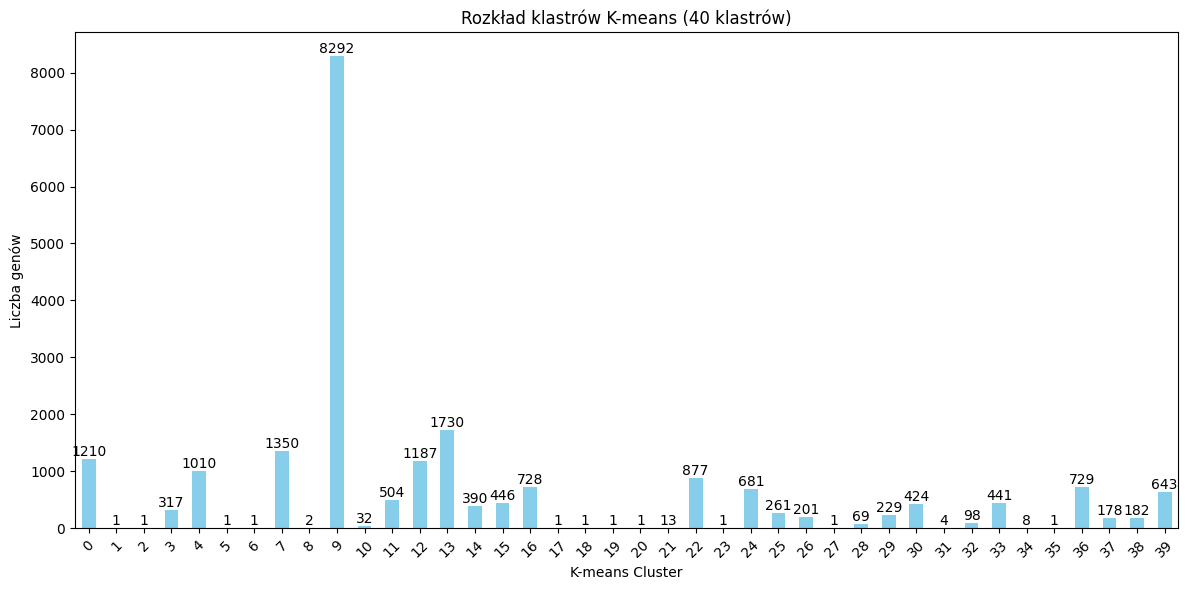

In [25]:
import matplotlib.pyplot as plt

kmeans_cluster_counts = merged_kmeans_wgcna['Cluster_40'].value_counts()

plt.figure(figsize=(12, 6))
bars = kmeans_cluster_counts.sort_index().plot(kind='bar', color='skyblue')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', fontsize=10)

plt.title('Rozkład klastrów K-means (40 klastrów)')
plt.xlabel('K-means Cluster')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


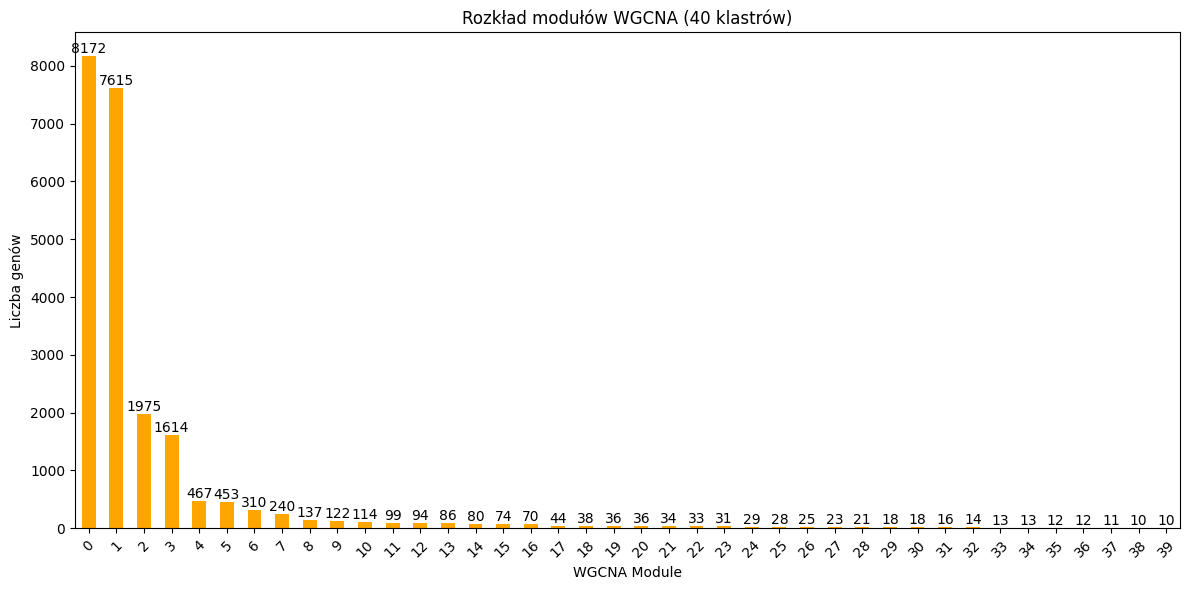

In [26]:

wgcna_module_counts = merged_kmeans_wgcna['Module'].value_counts()


plt.figure(figsize=(12, 6))
bars = wgcna_module_counts.sort_index().plot(kind='bar', color='orange')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', fontsize=10)

plt.title('Rozkład modułów WGCNA (40 klastrów)')
plt.xlabel('WGCNA Module')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


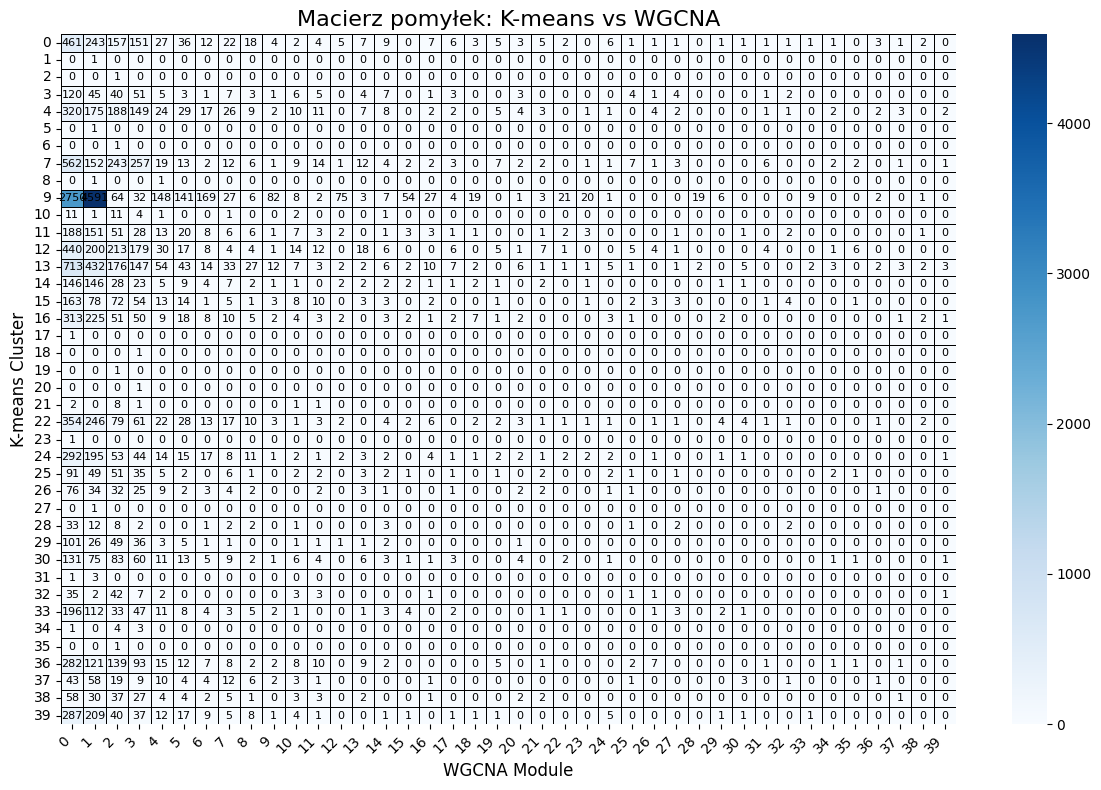

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(merged_kmeans_wgcna['Cluster_40'], merged_kmeans_wgcna['Module'])


plt.figure(figsize=(12, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 8, "color": "black"},
    linecolor='black',
    linewidths=0.5
)
plt.title('Macierz pomyłek: K-means vs WGCNA', fontsize=16)
plt.xlabel('WGCNA Module', fontsize=12)
plt.ylabel('K-means Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [28]:

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=merged_kmeans_wgcna['Cluster_40'].unique(),
    columns=merged_kmeans_wgcna['Module'].unique()
)

conf_matrix_df = conf_matrix_df.sort_index(axis=0).sort_index(axis=1)


conf_matrix_df.to_csv('confusion_matrix_kmeans_vs_wgcna.csv', index_label='Cluster_40')

print("Macierz pomyłek została zapisana do pliku 'confusion_matrix_kmeans_vs_wgcna.csv'.")


Macierz pomyłek została zapisana do pliku 'confusion_matrix_kmeans_vs_wgcna.csv'.


In [29]:

total_genes = len(merged_kmeans_wgcna)
print(f"Łączna liczba genów biorących udział w porównaniu: {total_genes}")


same_cluster_genes = merged_kmeans_wgcna[merged_kmeans_wgcna['Cluster_40'] == merged_kmeans_wgcna['Module']]
num_same_cluster_genes = len(same_cluster_genes)
print(f"Liczba genów przypisanych do tych samych klastrów w obu metodach: {num_same_cluster_genes}")


same_cluster_genes.to_csv('same_cluster_genes.csv', index=False)
print("Lista genów przypisanych do tych samych klastrów zapisana do pliku 'same_cluster_genes.csv'.")

different_cluster_genes = merged_kmeans_wgcna[merged_kmeans_wgcna['Cluster_40'] != merged_kmeans_wgcna['Module']]
num_different_cluster_genes = len(different_cluster_genes)
print(f"Liczba genów przypisanych do różnych klastrów w obu metodach: {num_different_cluster_genes}")

different_cluster_genes.to_csv('different_cluster_genes.csv', index=False)
print("Lista genów przypisanych do różnych klastrów zapisana do pliku 'different_cluster_genes.csv'.")

common_genes_count = best_matches_df['Common Genes'].sum()
print(f"Liczba wspólnych genów między najlepszymi dopasowanymi klastrami: {common_genes_count}")


Łączna liczba genów biorących udział w porównaniu: 22247
Liczba genów przypisanych do tych samych klastrów w obu metodach: 646
Lista genów przypisanych do tych samych klastrów zapisana do pliku 'same_cluster_genes.csv'.
Liczba genów przypisanych do różnych klastrów w obu metodach: 21601
Lista genów przypisanych do różnych klastrów zapisana do pliku 'different_cluster_genes.csv'.
Liczba wspólnych genów między najlepszymi dopasowanymi klastrami: 10056



Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):
K-means Cluster 9 (8292 genów) najlepiej dopasowany do klastra hierarchicznego 40 (8303 genów) (8292 wspólnych genów)
K-means Cluster 13 (1730 genów) najlepiej dopasowany do klastra hierarchicznego 12 (1711 genów) (1711 wspólnych genów)
K-means Cluster 12 (1187 genów) najlepiej dopasowany do klastra hierarchicznego 34 (1185 genów) (1185 wspólnych genów)
K-means Cluster 0 (1210 genów) najlepiej dopasowany do klastra hierarchicznego 39 (1158 genów) (1158 wspólnych genów)
K-means Cluster 7 (1350 genów) najlepiej dopasowany do klastra hierarchicznego 18 (1121 genów) (1118 wspólnych genów)
K-means Cluster 4 (1010 genów) najlepiej dopasowany do klastra hierarchicznego 2 (1024 genów) (1010 wspólnych genów)
K-means Cluster 22 (877 genów) najlepiej dopasowany do klastra hierarchicznego 22 (862 genów) (844 wspólnych genów)
K-means Cluster 16 (728 genów) najlepiej dopasowany do klastra hierarchicznego 19 (739 genów) (728 w

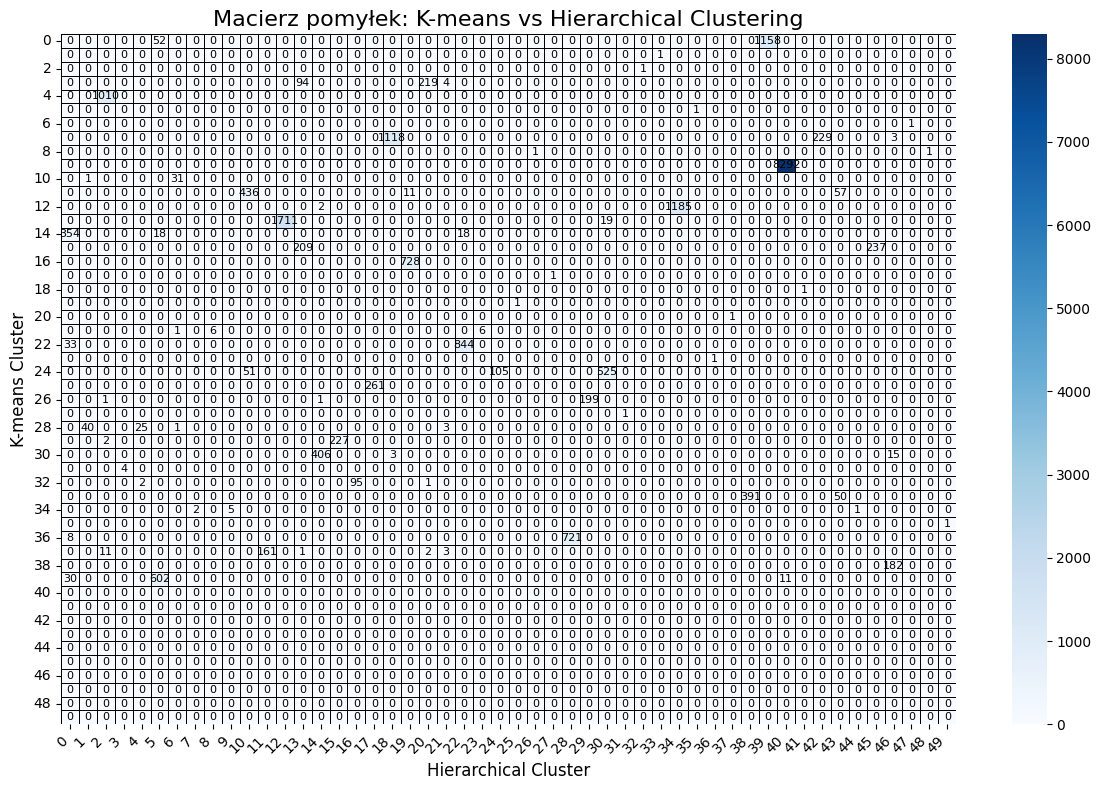


Adjusted Rand Index (ARI): 0.9865782187866668


In [37]:

import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

kmeans_file_path = "kmeans_40_clusters.csv"
hierarchical_file_path = "hierarchical_clustering_results.csv"
kmeans_data = pd.read_csv(kmeans_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)
kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)


merged_kmeans_hierarchical = pd.merge(kmeans_data, hierarchical_data, on='Gene')

def compare_and_report_clusters(df, kmeans_col, hierarchical_col, min_common_genes=5, top_n=None):
    kmeans_clusters = df.groupby(kmeans_col)['Gene'].apply(set)
    hierarchical_clusters = df.groupby(hierarchical_col)['Gene'].apply(set)

    best_matches = []
    reports = []

    for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
        best_match = None
        max_overlap = 0
        best_hierarchical_genes = set()
        matches = []

        for hierarchical_cluster, hierarchical_genes in hierarchical_clusters.items():
            overlap = len(kmeans_genes & hierarchical_genes)
            if overlap > max_overlap:
                max_overlap = overlap
                best_match = hierarchical_cluster
                best_hierarchical_genes = hierarchical_genes

            if overlap >= min_common_genes:
                matches.append({
                    'K-means Cluster': kmeans_cluster,
                    'Hierarchical Cluster': hierarchical_cluster,
                    'Common Genes Count': overlap,
                    'Total Genes in K-means Cluster': len(kmeans_genes),
                    'Total Genes in Hierarchical Cluster': len(hierarchical_genes),
                })

        best_matches.append({
            'K-means Cluster': kmeans_cluster,
            'K-means Genes': len(kmeans_genes),
            'Best Hierarchical Cluster': best_match,
            'Hierarchical Genes': len(best_hierarchical_genes),
            'Common Genes': max_overlap
        })

        sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
        if top_n:
            sorted_matches = sorted_matches[:top_n]

        for match in sorted_matches:
            report = (
                f"K-means Cluster {match['K-means Cluster']} "
                f"({match['Total Genes in K-means Cluster']} genów) "
                f"najlepiej dopasowany do klastra hierarchicznego {match['Hierarchical Cluster']} "
                f"({match['Total Genes in Hierarchical Cluster']} genów) "
                f"({match['Common Genes Count']} wspólnych genów)"
            )
            reports.append(report)

    print("\nNajlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):")
    best_matches = sorted(best_matches, key=lambda x: x['Common Genes'], reverse=True)
    for match in best_matches:
        print(
            f"K-means Cluster {match['K-means Cluster']} ({match['K-means Genes']} genów) "
            f"najlepiej dopasowany do klastra hierarchicznego {match['Best Hierarchical Cluster']} "
            f"({match['Hierarchical Genes']} genów) ({match['Common Genes']} wspólnych genów)"
        )

    with open("cluster_reports.txt", "w") as f:
        for report in reports:
            f.write(report + "\n")
    print("\nRaport zapisany do pliku 'cluster_reports.txt'.")


    conf_matrix = confusion_matrix(df[kmeans_col], df[hierarchical_col])

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=True,
        annot_kws={"size": 8, "color": "black"},
        linecolor='black',
        linewidths=0.5
    )
    plt.title('Macierz pomyłek: K-means vs Hierarchical Clustering', fontsize=16)
    plt.xlabel('Hierarchical Cluster', fontsize=12)
    plt.ylabel('K-means Cluster', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


    ari = adjusted_rand_score(df[kmeans_col], df[hierarchical_col])
    print(f"\nAdjusted Rand Index (ARI): {ari}")

    return best_matches, reports, conf_matrix, ari


best_matches, reports, conf_matrix, ari = compare_and_report_clusters(
    merged_kmeans_hierarchical, 'Cluster_40', 'Agg_Cluster_50', min_common_genes=5, top_n=5
)



Najlepsze dopasowanie modułów WGCNA do klastrów hierarchicznych:
1. Moduł WGCNA 1 (7615 genów) najlepiej dopasowany do klastra hierarchicznego 40 (8303 genów) (4598 wspólnych genów).
2. Moduł WGCNA 24 (29 genów) najlepiej dopasowany do klastra hierarchicznego 5 (672 genów) (6 wspólnych genów).
3. Moduł WGCNA 0 (8172 genów) najlepiej dopasowany do klastra hierarchicznego 40 (8303 genów) (2753 wspólnych genów).
4. Moduł WGCNA 2 (1975 genów) najlepiej dopasowany do klastra hierarchicznego 34 (1185 genów) (213 wspólnych genów).
5. Moduł WGCNA 19 (36 genów) najlepiej dopasowany do klastra hierarchicznego 2 (1024 genów) (5 wspólnych genów).
6. Moduł WGCNA 6 (310 genów) najlepiej dopasowany do klastra hierarchicznego 40 (8303 genów) (169 wspólnych genów).
7. Moduł WGCNA 5 (453 genów) najlepiej dopasowany do klastra hierarchicznego 40 (8303 genów) (141 wspólnych genów).
8. Moduł WGCNA 3 (1614 genów) najlepiej dopasowany do klastra hierarchicznego 18 (1121 genów) (211 wspólnych genów).
9. Modu

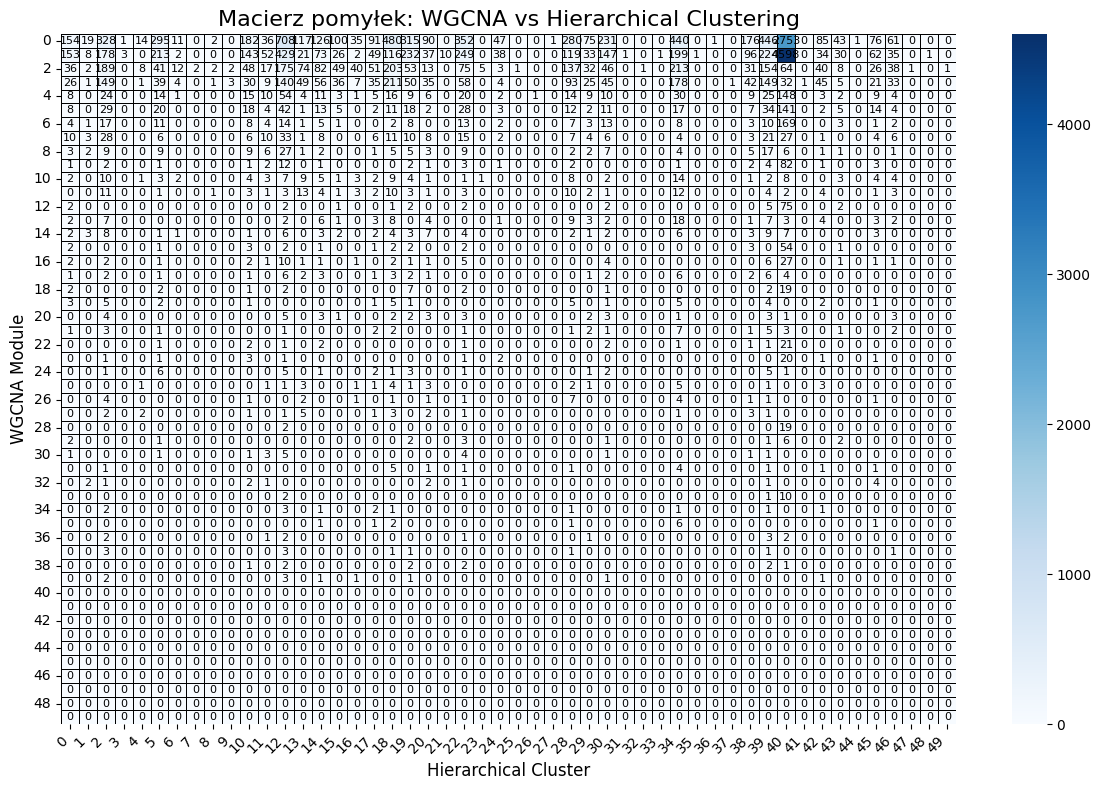


Adjusted Rand Index (ARI): 0.1197


In [42]:
import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

wgcna_file_path = 'modules_and_genes.csv'
hierarchical_file_path = 'hierarchical_clustering_results.csv'
wgcna_data = pd.read_csv(wgcna_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)


hierarchical_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)


merged_wgcna_hierarchical = pd.merge(wgcna_data, hierarchical_data, on='Gene')


def generate_best_match_report(df, wgcna_col, hierarchical_col):
    """
    Generuje raport najlepszego dopasowania modułów WGCNA do klastrów hierarchicznych.

    Args:
        df (pd.DataFrame): Połączony DataFrame z przypisaniami genów.
        wgcna_col (str): Kolumna z numerami modułów WGCNA.
        hierarchical_col (str): Kolumna z numerami klastrów hierarchicznych.

    Returns:
        List[str]: Lista raportów tekstowych.
    """
    reports = []

    for wgcna_module in df[wgcna_col].unique():
        wgcna_genes = set(df[df[wgcna_col] == wgcna_module]['Gene'])
        best_match = None
        max_common_genes = 0
        best_cluster_size = 0
        best_hierarchical_cluster = None

        for hierarchical_cluster in df[hierarchical_col].unique():
            hierarchical_genes = set(df[df[hierarchical_col] == hierarchical_cluster]['Gene'])
            common_genes = wgcna_genes & hierarchical_genes
            if len(common_genes) > max_common_genes:
                max_common_genes = len(common_genes)
                best_hierarchical_cluster = hierarchical_cluster
                best_cluster_size = len(hierarchical_genes)

        if best_hierarchical_cluster is not None:
            report = (
                f"Moduł WGCNA {wgcna_module} ({len(wgcna_genes)} genów) "
                f"najlepiej dopasowany do klastra hierarchicznego {best_hierarchical_cluster} "
                f"({best_cluster_size} genów) ({max_common_genes} wspólnych genów)."
            )
            reports.append(report)

    return reports

# Generowanie raportu i zapis do pliku
best_match_reports = generate_best_match_report(merged_wgcna_hierarchical, 'Module', 'Agg_Cluster_50')

print("\nNajlepsze dopasowanie modułów WGCNA do klastrów hierarchicznych:")
for i, report in enumerate(best_match_reports, 1):
    print(f"{i}. {report}")

with open("wgcna_best_match_cluster_reports.txt", "w") as f:
    for report in best_match_reports:
        f.write(report + "\n")
print("\nRaport zapisany do pliku 'wgcna_best_match_cluster_reports.txt'.")
conf_matrix = confusion_matrix(merged_wgcna_hierarchical['Module'], merged_wgcna_hierarchical['Agg_Cluster_50'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 8, "color": "black"},
    linecolor='black',
    linewidths=0.5
)
plt.title('Macierz pomyłek: WGCNA vs Hierarchical Clustering', fontsize=16)
plt.xlabel('Hierarchical Cluster', fontsize=12)
plt.ylabel('WGCNA Module', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


ari_wgcna_hierarchical = adjusted_rand_score(
    merged_wgcna_hierarchical['Module'],
    merged_wgcna_hierarchical['Agg_Cluster_50']
)
print(f"\nAdjusted Rand Index (ARI): {ari_wgcna_hierarchical:.4f}")
